Makine Öğrenimi (Makine Öğrenmesi) Nedir?

Makine öğrenimi, bilgisayarlara veriden çıkarım yaparak karar alma yeteneği kazandıran bir yöntemdir. Bu, veriyi işleyerek bir modelin öğrenme sürecini gerçekleştirmesine olanak sağlar. Dolayısıyla, elde yeterli veri bulunduğunda karmaşık problemleri çözmek için kodlama yapmadan kullanılabilir.

Örneğin:

Kredi başvurularını değerlendirerek kredi verme kararı alma süreci
Müşteri satın alma alışkanlıklarını analiz ederek kişiselleştirilmiş öneri sistemleri oluşturma
Hastane kayıtlarını inceleyerek hastalık teşhisi koyma
Bu örnekler, makine öğrenimi problemlerine örnektir. Makine öğrenimi genellikle üç temel kategoriye ayrılır:

Gözetimli (Denetimli) Öğrenme: Etiketlenmiş veriden çıkarım yapmayı öğrenir. Model, doğru ve yanlış cevapların verildiği eğitim verileriyle eğitilir. Kredi verme kararı alma projesinde, geçmiş kredi başvurularının etiketlenmiş verisiyle model eğitilebilir.


Gözetimsiz (Denetimsiz) Öğrenme: Etiketlenmemiş veriden çıkarım yapmayı öğrenir. Bu, veri setindeki herhangi bir etiket olmadan modele veri sağlanmasıdır. Örneğin, müşteri segmentasyonu için kullanılabilir.
Takviyeli (Pekiştirmeli) Öğrenme: Davranışçılıktan esinlenen bir yaklaşımdır ve en yüksek ödül miktarını elde etmek için hangi eylemlerin yapılması gerektiğini öğrenmeye odaklanır. Bu, belirli eylemlerin sonuçlarına dayanarak modelin davranışlarını şekillendirir.

Kredi verme kararı alma projemiz için gözetimli öğrenme yöntemini kullanacağız. Gözetimli öğrenme, etiketlenmiş veri setlerinden çıkarım yaparak öğrenen bir makine öğrenimi yaklaşımıdır. Bu yöntem, önceden etiketlenmiş verilerle birlikte eğitilmiş bir modelin, yeni gelen verileri değerlendirerek doğru tahminler yapmasını sağlar.

Gözetimli öğrenme, bir giriş değişkeni  𝑋 ile bu girişe karşılık gelen bir çıkış değişkeni 𝑌 arasındaki ilişkiyi modellemek için kullanılır. Bir veri seti D = {(x1,y1),....,(xn,yn)} şeklinde ifade edilir, burada n veri noktası bulunur ve xi girişler, yi ise çıktılardır.

Amacımız, bu veri seti üzerinde bir fonksiyon f : 𝑋 → 𝑌 öğrenmektir. Bu fonksiyon, giriş verisi 𝑥 verildiğinde, doğru çıktı 𝑦 tahminini yapar.

Gözetimli öğrenme sürecinde, modelimizin tahminlerinin gerçek değerlerle ne kadar uyumlu olduğunu ölçmek için bir kayıp fonksiyonu
𝐿
(
𝑦
,
𝑦
^
)
kullanırız. Burada
𝑦
gerçek çıktı,
𝑦
^ise modelin tahmini çıktıdır.

Amacımız, bu kayıp fonksiyonunu minimize eden bir model parametrelerini bulmaktır. Bu genellikle bir optimizasyon algoritması kullanılarak yapılır. Sonuç olarak, gözetimli öğrenme, giriş ve çıkış arasındaki ilişkiyi modellemek için kullanılan bir yapay zeka yaklaşımıdır.

In [15]:
#Veriyi temizlemek, işlemek ve görselleştirmek için gerekli kütüphanelerimizi dahil ederek başlayalım.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

•pandas kütüphanesini, veri analizi ve işlemleri için kullanırız. Genellikle veri setlerini yüklemek, işlemek ve analiz etmek için kullanılır.

•numpy kütüphanesini, çok boyutlu diziler ve matematiksel işlemler için kullanırız. Özellikle, veri setlerini temsil etmek ve üzerinde matematiksel işlemler yapmak için yaygın olarak kullanılır.

•matplotlib kütüphanesini, grafik çizmek ve görselleştirmek için kullanırız. pyplot modülü, basit ve etkileyici grafikler oluşturmak için kullanılır.

•seaborn kütüphanesini, veri görselleştirmesi ve istatistiksel grafikler oluşturmak için kullanırız.


In [16]:
# 'credit_risk.csv' adlı dosyadan kredi riski veri setini pandas kütüphanesi sayesinde df adlı parametreye atadık.
df = pd.read_csv('/content/drive/MyDrive/Veri/credit_risk.csv')

Bu veri seti, kredi başvuru sahiplerinin temel bilgilerini ve karakteristiklerini içeren bir veri setidir. Bu veri setinin amacı, kredi başvuru sahiplerinin özelliklerine dayanarak kredi varsayılan olasılığını tahmin etmek için tahmin modelleri geliştirmektir.

**Keşifsel Veri Analizi (EDA - Exploratory Data Analysis)**

İlk olarak, veri setini inceleyeceğiz ve içerdiği bilgiler hakkında bir genel bakış elde edeceğiz.

In [17]:
df.head()

,Id,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
0,0,22,59000,RENT,123.0,PERSONAL,35000,16.02,1,0.59,Y,3
1,1,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,N,2
2,2,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,N,3
3,3,23,65500,RENT,4.0,MEDICAL,35000,15.23,1,0.53,N,2
4,4,24,54400,RENT,8.0,MEDICAL,35000,14.27,1,0.55,Y,4


In [18]:
#Veriyi nümerik olarak özetleme yaklaşımıdır.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              32581 non-null  int64  
 1   Age             32581 non-null  int64  
 2   Income          32581 non-null  int64  
 3   Home            32581 non-null  object 
 4   Emp_length      31686 non-null  float64
 5   Intent          32581 non-null  object 
 6   Amount          32581 non-null  int64  
 7   Rate            29465 non-null  float64
 8   Status          32581 non-null  int64  
 9   Percent_income  32581 non-null  float64
 10  Default         32581 non-null  object 
 11  Cred_length     32581 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 3.0+ MB


Toplam 32581 giriş (satır) bulunmaktadır.

Toplam 12 sütun (veri özellikleri) bulunmaktadır.

Her bir sütunun ismi, eksik olmayan değer sayısı ve veri tipi belirtilmiştir.

Veri setinde eksik değerler bulunmaktadır. Örneğin, "Emp_length" sütununda 31686 dolu değer bulunurken diğer sütunlarda tam sayılmayan dolu değerler mevcuttur.

Veri tipleri, sayısal (int64 ve float64) ve kategorik (object) olarak belirlenmiştir.

In [19]:
df.describe()

,Id,Age,Income,Emp_length,Amount,Rate,Status,Percent_income,Cred_length
count,32581.000000,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,16290.006139,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,9405.479594,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,0.000000,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,8145.000000,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,16290.000000,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,24435.000000,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,32780.000000,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


df.describe() yöntemi, DataFrame'in sayısal sütunları için temel istatistiksel bilgileri sağlar.

- **Count (Sayı)**: Her bir sütundaki dolu (eksik olmayan) değerlerin sayısı.
- **Mean (Ortalama)**: Her bir sütundaki değerlerin aritmetik ortalaması.
- **Std (Standart Sapma)**: Her bir sütundaki değerlerin standart sapması.
- **Min (Minimum Değer)**: Her bir sütundaki en küçük değer.
- **25% (İlk Çeyrek)**: Her bir sütundaki değerlerin %25'ini temsil eden çeyrek yüzde noktası.
- **50% (Medyan)**: Her bir sütundaki değerlerin ortanca değeri.
- **75% (Üçüncü Çeyrek)**: Her bir sütundaki değerlerin %75'ini temsil eden çeyrek yüzde noktası.
- **Max (Maksimum Değer)**: Her bir sütundaki en büyük değer.

Bu istatistikler, DataFrame'in sayısal sütunlarının dağılımı hakkında genel bir fikir verir ve veri setindeki aykırı değerler veya tutarsızlıklar hakkında ilk bir bakış sunar.

In [20]:
df['Status'].value_counts()

Status
0    25473
1     7108
Name: count, dtype: int64

"Status" sütunundaki her bir benzersiz değerin sayısını hesaplar ve bu değerleri bir dizi olarak döndürür. Bu, onay durumlarının veri setindeki dağılımını görmemize olanak tanır.

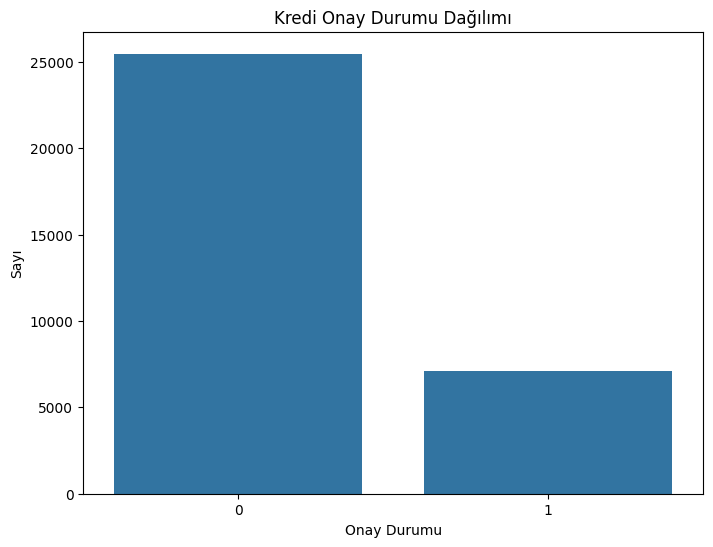

In [21]:
# Veri setindeki "Status" sütununun dağılımını görselleştirme
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Status')
plt.title('Kredi Onay Durumu Dağılımı')
plt.xlabel('Onay Durumu')
plt.ylabel('Sayı')
plt.show()


"Status" sütunundaki değerlerin dağılımını gösteren bir bar grafiği oluşturur. Bu grafik, her bir onay durumunun veri setinde ne kadar sıklıkta bulunduğunu gösterir.

In [22]:
#Verimizde null değer var mı yok mu bunu inceleyelim.
df.isnull().sum()

Id                   0
Age                  0
Income               0
Home                 0
Emp_length         895
Intent               0
Amount               0
Rate              3116
Status               0
Percent_income       0
Default              0
Cred_length          0
dtype: int64

Emp_length         895

Rate              3116

verilerinde eksikler var. Burada bu verileri doldurmak için en iyi yöntem diğer değerlerin ortalamasını alıp doldurmaktır.

In [23]:
# Eksik değerleri doldurmak için SimpleImputer kütüphanesini kullanıyoruz.
from sklearn.impute import SimpleImputer

# İmputer nesnesi oluşturuyoruz ve eksik değerleri sütunun ortalaması ile dolduracağımızı belirtiyoruz.
imputer = SimpleImputer(strategy='mean')

# 'Emp_length' sütunundaki eksik değerleri sütunun ortalaması ile dolduruyoruz.
df['Emp_length'] = imputer.fit_transform(df[['Emp_length']])

# 'Rate' sütunundaki eksik değerleri sütunun ortalaması ile dolduruyoruz.
df['Rate'] = imputer.fit_transform(df[['Rate']])


In [24]:
df.isnull().sum()

Id                0
Age               0
Income            0
Home              0
Emp_length        0
Intent            0
Amount            0
Rate              0
Status            0
Percent_income    0
Default           0
Cred_length       0
dtype: int64

In [25]:
# 'Id' sütunu veri setinden çıkarılır, çünkü bu sütun genellikle benzersiz bir kimlik numarasını temsil eder ve model eğitiminde kullanışlı değildir.
df = df.drop(columns=['Id'])

# 'Home' ve 'Intent' sütunları için one-hot encoding işlemi yapılır. Bu işlem, kategorik değerleri (örneğin, 'Own', 'Mortgage', 'Rent' gibi ev sahipliği durumları) ikili vektörler haline getirir.
# One-hot encoding, her bir kategorik değeri yeni bir ikili sütun haline getirir ve her bir gözlem için ilgili kategoriye ait sütunu 1 ile işaretler, diğerlerini ise 0 ile işaretler.
# 'Default' sütunu için de aynı işlem yapılır, ancak bu sütunun zaten ikili olduğu ve kredi başvuru sonucunu (ödeme yapıldı veya yapılmadı) temsil ettiği varsayılır.
df = pd.get_dummies(df, columns=['Home', 'Intent', 'Default'])

In [26]:
df.head()

,Age,Income,Emp_length,Amount,Rate,Status,Percent_income,Cred_length,Home_MORTGAGE,Home_OTHER,Home_OWN,Home_RENT,Intent_DEBTCONSOLIDATION,Intent_EDUCATION,Intent_HOMEIMPROVEMENT,Intent_MEDICAL,Intent_PERSONAL,Intent_VENTURE,Default_N,Default_Y
0,22,59000,123.0,35000,16.02,1,0.59,3,False,False,False,True,False,False,False,False,True,False,False,True
1,21,9600,5.0,1000,11.14,0,0.10,2,False,False,True,False,False,True,False,False,False,False,True,False
2,25,9600,1.0,5500,12.87,1,0.57,3,True,False,False,False,False,False,False,True,False,False,True,False
3,23,65500,4.0,35000,15.23,1,0.53,2,False,False,False,True,False,False,False,True,False,False,True,False
4,24,54400,8.0,35000,14.27,1,0.55,4,False,False,False,True,False,False,False,True,False,False,False,True


In [28]:
# Hedef değişkeni belirleyelim.
X = df.drop(columns=['Status'])
y = df['Status']

In [29]:
# Veri setini eğitim ve test setlerine ayırmak için sklearn kütüphanesinden train_test_split fonksiyonunu kullanıyoruz.
from sklearn.model_selection import train_test_split

# X, bağımsız değişkenleri temsil eden özellik matrisi ve y, hedef değişkeni temsil eden vektördür.

# Veri setini eğitim (%50) ve geçici (%50) setlere ayırıyoruz. random_state parametresi, veriyi rastgele bölmenin tekrarlanabilir olmasını sağlar.
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.5, random_state=42)

# Geçici seti, doğrulama (%40) ve test (%60) setlerine ayırıyoruz.
# Geçici seti daha önce belirlenen oranda doğrulama ve test setlerine ayırmamızın nedeni,
# doğrulama seti üzerinde modeli ayarlayıp test seti üzerinde modelin nihai performansını değerlendirmektir.
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.4, random_state=42)



Bu kod, veri setini üç parçaya böler:

1. Eğitim seti (X_train ve y_train): Modelin eğitimini yapmak için kullanılan veri.
2. Doğrulama seti (X_val ve y_val): Modelin ayarlanması ve hiperparametrelerin ayarlanması için kullanılan veri.
3. Test seti (X_test ve y_test): Modelin nihai performansını değerlendirmek için kullanılan veri.

Bu işlem, modelin doğruluğunu ve genelleme yeteneğini doğrulamak için ayrı test verilerine sahip olmamızı sağlar. Ayrıca, doğrulama seti, modelin eğitim sırasında overfitting olup olmadığını kontrol etmek için kullanılır.

In [30]:
# Veri boyutlarını kontrol edelim.
print("Eğitim verisi boyutu:", X_train.shape)
print("Doğrulama verisi boyutu:", X_val.shape)
print("Test verisi boyutu:", X_test.shape)

Eğitim verisi boyutu: (16290, 19)
Doğrulama verisi boyutu: (9774, 19)
Test verisi boyutu: (6517, 19)


In [31]:
# Feature selection işlemi için sklearn kütüphanesinden SelectKBest ve f_classif fonksiyonlarını kullanıyoruz.
from sklearn.feature_selection import SelectKBest, f_classif
# Model performansının değerlendirilmesi ve karşılaştırılması için sklearn kütüphanesinden cross_val_score fonksiyonunu kullanıyoruz.
from sklearn.model_selection import cross_val_score
# Random Forest algoritması için sklearn kütüphanesinden RandomForestClassifier fonksiyonunu kullanıyoruz.
from sklearn.ensemble import RandomForestClassifier
# Model performansını değerlendirmek için sklearn kütüphanesinden accuracy_score fonksiyonunu kullanıyoruz.
from sklearn.metrics import accuracy_score

# En iyi 4 özelliği seçmek için bir SelectKBest nesnesi oluşturuyoruz.
# score_func parametresi olarak f_classif kullanarak, ANOVA F-test istatistiğini kullanıyoruz.
# k parametresi ile en iyi k özelliğin seçileceğini belirtiyoruz.
selector = SelectKBest(score_func=f_classif, k=3)

# X_train üzerindeki özelliklerin seçilmiş hallerini elde ediyoruz.
X_train_selected = selector.fit_transform(X_train, y_train)

# Çapraz doğrulama kullanarak modelin performansını değerlendiriyoruz.
# cross_val_score, belirtilen modelin belirtilen özelliklerle çapraz doğrulama performansını hesaplar.
# cv parametresi, çapraz doğrulama kat sayısını belirtir.
clf = RandomForestClassifier(random_state=42)
cv_scores = cross_val_score(clf, X_train_selected, y_train, cv=5)

# En iyi modeli eğitim verisinde buluyoruz.
# cv_scores.argmax(), en yüksek doğruluk skoruna sahip olan çapraz doğrulama katının dizinini döndürür.
best_score_index = cv_scores.argmax()
# Seçilen en iyi özelliklerin isimlerini alıyoruz.
best_features = X_train.columns[selector.get_support()]
# En iyi modeli seçilen en iyi özelliklerle eğitiyoruz.
best_model = RandomForestClassifier(random_state=42)
best_model.fit(X_train[best_features], y_train)


RandomForestClassifier(random_state=42)

Bu kodu, veri setindeki özellikleri seçmek, çapraz doğrulama yapmak ve en iyi modeli eğitmek için kullandık.

In [34]:
# En iyi modelin eğitim verisindeki doğruluğunu hesaplayalım
y_pred_train = best_model.predict(X_train[best_features])

# Doğruluk skorunu hesaplayalım
train_accuracy = accuracy_score(y_train, y_pred_train)
print("Eğitim verisindeki doğruluk:", train_accuracy)


Eğitim verisindeki doğruluk: 0.9359729895641498


In [35]:
# En iyi modelin doğrulama verisindeki doğruluğunu hesaplayalım
y_pred_val = best_model.predict(X_val[best_features])

# Doğruluk skorunu hesaplayalım
validation_accuracy = accuracy_score(y_val, y_pred_val)
print("Doğrulama verisindeki doğruluk:", validation_accuracy)


Doğrulama verisindeki doğruluk: 0.8513402905668099


In [36]:
# En iyi modelin test verisindeki doğruluğunu hesaplayalım
y_pred_test = best_model.predict(X_test[best_features])

# Doğruluk skorunu hesaplayalım
test_accuracy = accuracy_score(y_test, y_pred_test)
print("Test verisindeki doğruluk:", test_accuracy)


Test verisindeki doğruluk: 0.8563756329599509


Yaptıklarımızı kısaca özetlersek:

1. **Özellik Seçimi (Feature Selection)**:
   - Özellik seçimi, veri setindeki önemli özellikleri belirleyerek modelin karmaşıklığını azaltır ve gereksiz özelliklerin etkisini en aza indirir. Bu, veri setinin boyutunu azaltır ve modelin daha iyi genelleme yapmasını sağlar. Seçilen en iyi özellikler, hedef değişkenle en güçlü ilişkiye sahip olanlardır. Bu ilişki, istatistiksel yöntemlerle ölçülür.

2. **Model Seçimi (Model Selection)**:
   - Model seçimi, veri setine en iyi uyan modelin belirlenmesini sağlar. Modellerin performansı, belirli bir özellik kümesi üzerinde çapraz doğrulama kullanılarak değerlendirilir.

3. **Çapraz Doğrulama (Cross Validation)**:
   - Çapraz doğrulama, modelin genelleme yeteneğini değerlendirmek için kullanılır. Veri seti, belirli bir sayıda parçaya (kat) bölünür ve her bir kat üzerinde model eğitilir ve diğer katlar üzerinde değerlendirilir. Bu işlem, veri setinin farklı bölümlerini kullanarak modelin performansını değerlendirir ve modelin ne kadar iyi genelleme yaptığını belirler.

Çapraz doğrulama işlemi genellikle veri setini \( k \) parçaya böler ve \( k \) katlı çapraz doğrulama (k-fold cross-validation) adı verilen bir süreç izler. Her kat için, model eğitilir ve geri kalan katlar üzerinde değerlendirilir. Bu işlem \( k \) kez tekrarlanır ve sonuçlar ortalaması alınarak modelin performansı belirlenir.

Bu süreç, modelin eğitim verisindeki ve farklı test verilerindeki performansını değerlendirerek overfitting (aşırı uydurma) veya underfitting (yetersiz uyum) gibi sorunları tespit etmeye yardımcı olur. Bu şekilde, modelin gerçek dünya verileri üzerinde ne kadar iyi performans göstereceğini daha güvenilir bir şekilde tahmin edebiliriz.